In [1]:
using NeuralNetworkAnalysis, JLD2, Plots, DifferentialEquations
const NNA = NeuralNetworkAnalysis
const RA = ReachabilityAnalysis

┌ Info: Precompiling NeuralNetworkAnalysis [73c0b437-a350-4e9b-97ac-9adb151c271b]
└ @ Base loading.jl:1278
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
│   exception = Required dependency GLPKMathProgInterface [3c7084bd-78ad-589a-b5bb-dbd673274bea] failed to load from a cache file.
└ @ Base loading.jl:1042
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for NeuralNetworkAnalysis [73c0b437-a350-4e9b-97ac-9adb151c271b]
│   exception = ErrorException("Required dependency GLPKMathProgInterface [3c7084bd-78ad-589a-b5bb-dbd673274bea] failed to load from a cache file.")
└ @ Base loading.jl:1042
┌ Info: Precompiling ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
└ @ Base loading.jl:1278
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
│   excep

ReachabilityAnalysis

In [2]:
@load "/home/sguadalupe/.julia/dev/NeuralNetworkAnalysis/models/Sherlock-Benchmark-9/controller9.jld2" controller

1-element Array{Symbol,1}:
 :controller

In [3]:
@taylorize function benchmark9!(dx, x, p, t)
    x₁, x₂, x₃, x₄, u = x

    aux = 0.1 * sin(x₃)
    dx[1] = x₂
    dx[2] = -x₁ + aux
    dx[3] = x₄
    dx[4] = u
    dx[5] = zero(u)
end

In [23]:
X₀ = Hyperrectangle(low=[0.6, -0.7, -0.4, 0.5], high=[0.7, -0.6, -0.3, 0.6])

U₀ = Universe(1)
prob = @ivp(x' = benchmark9!(x), dim: 5, x(0) ∈ X₀ × U₀)
vars_idx = Dict(:state_vars=>1:4, :input_vars=>[], :control_vars=>[5]);
plant = ControlledPlant(prob, controller, vars_idx, 1.0);

In [24]:
simulations, controls = NeuralNetworkAnalysis.simulate(plant, T=5.0)

using Plots
fig = plot(BallInf(zeros(2), 1.0), vars=(1, 2), color=:white, linecolor=:black, lw=5.0)
for simulation in simulations
    plot!(fig, simulation, vars=(1, 2))
end

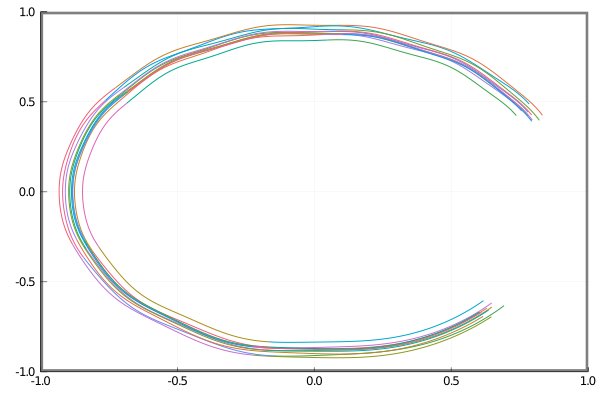

In [25]:
fig